<a href="https://colab.research.google.com/github/marcelozanchetta/EDS104/blob/main/Lab3_Atividade_Dados_Exploratorios_Pre_Processamento_Dist%C3%A2ncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório 3 - Atividade**

Esse laboratório explora estratégias de pré-processamento de dados e análise de similaridade com distâncias na Linguagem Python.

* A análise pode envolver dados de baixa qualidade que ocorrem devido a
atributos irrelevantes, valores ausentes ou redundantes. Então, o uso de estratégias de pré-processamento de dados consiste em um amplo conjunto de técnicas de limpeza e transformação de dados para aprimorar a análise dos dados.

* A métrica distância permite quantificar a similaridade ou dissimilaridade entre objetos de dados. Essa quantificação é importante para agrupar objetos de dados com características semelhantes. As distâncias podem ser usadas para detectar anomalias, ou seja, objetos que se desviam significativamente do padrão.

---
# **Pré-Processamento**
---

 **Qualidade dos dados**

Como já discutido em nosso curso, a baixa qualidade dos dados pode ter um efeito na análise dos dados. Entre os problemas comuns estão ruído, outliers, valores ausentes e dados duplicados.

Nesse laboratório, vamos continuar as análise com as operações de pré-processamento. Vamos usar um conjunto de dados de exemplo do repositório de aprendizado de máquina da UCI que contém informações sobre pacientes com câncer de mama (https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original).

Informações adicionais sobre os descritores:
1. Número de código da amostra: número de identificação (Sample code number)
2. Espessura do aglomerado: 1 - 10 (Clump Thickness)
3. Uniformidade do tamanho da célula: 1 - 10 (Uniformity of Cell Size)
4. Uniformidade da forma da célula: 1 - 10 (Uniformity of Cell Shape)
5. Adesão marginal: 1 - 10 (Marginal Adhesion)
6. Tamanho de uma única célula epitelial: 1 - 10 (Single Epithelial Cell Size)
7. Núcleos Bare (sem citoplasma): 1 - 10 (Bare Nuclei)
8. Cromatina sem brilho: 1 - 10 (Bland Chromatin)
9. Nucléolos normais: 1 - 10 (Normal Nucleoli)
10. Mitoses: 1 - 10 (Mitoses)
11. Classe: (2 para benigno, 4 para maligno)


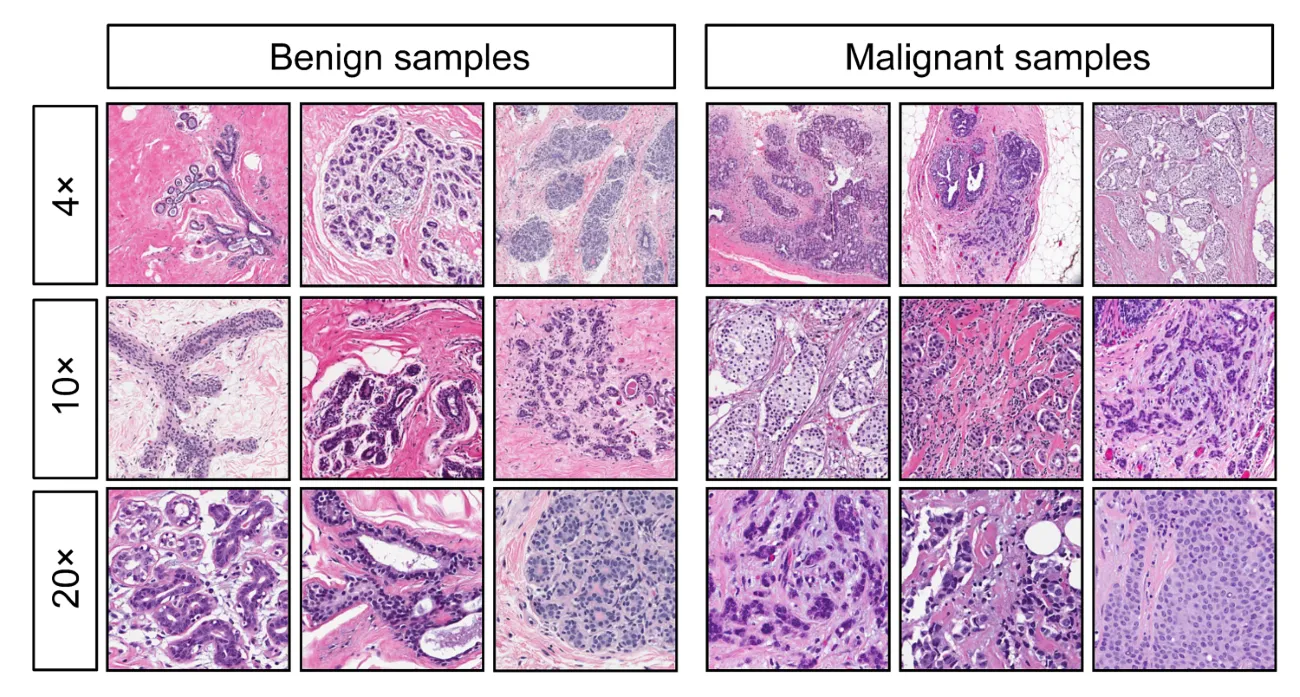

Referência: https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd

Vamos fazer download do conjunto de dados para o Colab e exibir os primeiros 5 amostras.

In [1]:
# Lendo o arquivo de um link da internet
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

In [2]:
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [ ]:
# retira informação do código da amostra
data = data.drop(['Sample code'],axis=1)

# apresenta as informações internas do dataset dos primeiros 5 exemplos
print('Número de instâncias (exemplos) = %d' % (data.shape[0]))
print('Número de atributos = %d' % (data.shape[1]))
data.head()

In [ ]:
# as colunas e os tipos de dados
data.info()

In [ ]:
# Apenas colunas do dataset
list(data.columns.values)

Uma operação de dividir e combinar pode ser calculada com o método groupby() do DataFrames para valores máximos. Outras métricas podem ser avaliadas.

In [ ]:
data.groupby('Class').max()

In [ ]:
# uma forma de consulta baseado no atributo Clump Thickness
data.groupby('Clump Thickness')['Normal Nucleoli'].max()

In [ ]:
# executar agregações
primeiros_5 = data.head(5)
#unstack() para organizar os rótulos de índice
primeiros_5.groupby('Bare Nuclei')['Normal Nucleoli'].describe().unstack()

**Valores Ausentes**

Em alguns datasets, não é incomum que um objeto esteja faltando um ou mais valores de atributos. Aqui temos exemplos de diferentes abordagens para tratar os valores ausentes. Nossa primeira etapa é converter os valores ausentes em NaNs.

In [ ]:
import numpy as np

data = data.replace('?',np.NaN)

print('Número de exemplos = %d' % (data.shape[0]))
print('Número de atributos = %d' % (data.shape[1]))

print('Número de valores ausentes:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Observe que somente a coluna "Bare Nuclei" contém valores ausentes. Os valores ausentes na coluna "Bare Nuclei" são substituídos pelo valor mediano dessa coluna. Os valores antes e depois da substituição são mostrados para um subconjunto dos pontos de dados.

In [ ]:
data2 = data['Bare Nuclei']

print('Antes do tratamento dos valores ausentes:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nApós tratamento dos valores:')
print(data2[20:25])

Em vez de substituir os valores ausentes, outra abordagem comum é descartar as amostras que contêm valores ausentes. Isso pode ser feito aplicando a função dropna() aos dados.

In [ ]:
print('Número de linha nos dados originais = %d' % (data.shape[0]))

data2 = data.dropna()
print('Número de linhas após a operação de descarte dos valores = %d' % (data2.shape[0]))

No boxplot apenas cinco das colunas (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contêm valores altos (anormais).

In [ ]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

Para descartar os outliers, podemos usar o Z-score (medida usada para descrever a posição relativa de um valor dentro de um conjunto de dados) de cada atributo, ou seja, avaliar a medida estatística que indica o quão distante um determinado valor está da média de uma distribuição normal.

Isso permitirá remover as instâncias que contêm atributos com Z-score anormal.

Aqui é mostrado os resultados da padronização das colunas dos dados. Observe que os valores ausentes (NaN) não são afetados pelo processo de padronização.

In [ ]:
# Normaliza os dados com Z-score
Z = (data2-data2.mean())/data2.std()
Z[20:25]

In [ ]:
# um outro exemplo para normalização dos dados
from sklearn.preprocessing import MinMaxScaler
# Normaliza os dados usando escala Min-Max
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(data)

In [ ]:
# Imprime os dados normalizados
print(X_normalized)

In [ ]:
# descarta as colunas com Z > 3 ou Z <= -3.
print('Número de linhas antes de descartar os outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Número de linhas após descartar os valores ausentes = %d' % (Z2.shape[0]))

Número de linhas antes de descartar os outliers = 699
Número de linhas após descartar os valores ausentes = 632


Alguns conjuntos, especialmente aqueles obtidos pela fusão de várias fontes de dados, podem conter duplicatas ou amostras duplicadas. Então, vamos verificar se há instâncias duplicadas no conjunto de dados.

In [ ]:
dups = data.duplicated()
print('Valores duplicados = %d' % (dups.sum()))
data.loc[[11,28]]


A função drop_duplicates() retornará uma matriz booleana que indica se cada linha é uma duplicata de uma linha anterior na tabela. No exemplo, a instância com índice de linha 11 tem valores de atributos idênticos aos da instância com índice de linha 28.  Embora essas linhas duplicadas possam corresponder a amostras de indivíduos diferentes, neste exemplo, assumimos que são duplicadas e as amostras foram retiradas do mesmo indivíduo.

In [ ]:
print('Número de linhas antes da operação = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Número das linhas após a operação = %d' % (data2.shape[0]))

**Amostragem**

A amostragem é uma abordagem comumente usada para facilitar a redução de dados para análise exploratória de dados e a quantificação de incertezas devido a distribuições de dados variáveis.

Os métodos disponíveis para a amostragem de dados são:
*  a amostragem sem substituição, em que cada instância selecionada é removida  
do conjunto de dados, e
*  b) a amostragem com substituição, em que cada instância selecionada não é removida, permitindo que ela seja selecionada mais de uma vez na amostra.

Aqui é demonstrado a amostragem com substituição e sem substituição ao conjunto de dados de câncer de mama obtido do repositório da UCI.

In [ ]:
data.head()

 Segue uma amostragem de tamanho 3 selecionada aleatoriamente (sem substituição) dos dados originais.

In [ ]:
sample = data.sample(n=3)
sample

A seguir é demonstrado o uso de uma seleção randômica de 1% dos dados (sem substituição) e mostrado as amostras selecionadas. O argumento randômico da função especifica o valor da semente (1) da busca pelo gerador de número randômico.

In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

Aqui há a amostragem com substituição para criar uma amostra cujo tamanho é igual a 1% dos dados completos. Você deve ser capaz de observar instâncias duplicadas na amostra aumentando o tamanho da amostra.

In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

**Discretização**

Etapa de pré-processamento de dados que é frequentemente usada para transformar um atributo de valor contínuo em um atributo categórico. O exemplo abaixo ilustra métodos simples, mas amplamente utilizados, de discretização não supervisionada aplicados ao atributo "Clump Thickness" do conjunto de dados de câncer de mama.

Um histograma que mostra a distribuição dos valores do atributo. A função value_counts() também pode ser aplicada para contar a frequência de cada valor de atributo.

In [ ]:
data['Clump Thickness'].hist(bins=10)


In [ ]:
data['Clump Thickness'].value_counts(sort=False)

Para o método de largura igual, podemos aplicar a função cut() para discretizar o atributo em 4 compartimentos de larguras de intervalo semelhantes. A função value_counts() pode ser usada para determinar o número de instâncias em cada compartimento.

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

Para o método de frequência igual, a função qcut() pode ser usada para particionar os valores em 4 compartimentos, de modo que cada compartimento tenha quase o mesmo número de instâncias.

In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

---
#  **Avaliando Distâncias**
---

**Distância Euclidiana**
A disntância Euclideana, d, entre dois pontos, x e y, em uma-, duas-, três-, ou mais alto espaço dimensional é dado pela seguinte equação:

 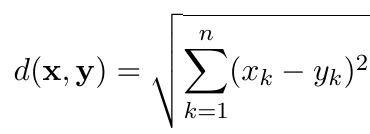

onde n é o número de dimensões e xk e yk são, respectivamente, o kth atributos de x e y.

In [ ]:
# Exemplo da função para cálculo da distância Euclidiana
import numpy as np

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Exemplo simples de uso
point1 = np.array([1, 2, 3, 4])
point2 = np.array([5, 6, 7, 8])
print("Distância Euclidiana:", euclidean_distance(point1, point2))

Vamos calcular nesse tópico medidas de similaridade e dissimilaridade:

In [ ]:
# Calcular a similaridade dos pares com Cosseno
def cosine_similarity_pair(datapoint1, datapoint2):
  return cosine_similarity(datapoint1.reshape(1, -1), datapoint2.reshape(1, -1))[0][0]

# Calcular a distância Euclidiana
def euclidean_distance_pair(datapoint1, datapoint2):
  return euclidean_distances(datapoint1.reshape(1, -1), datapoint2.reshape(1, -1))[0][0]

Operações para obter as métricas para duas medidas:

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Separação das features do rótulo no dataset
features = data.drop("Class", axis=1)
target = data["Class"]

# Avaliação entre as amostras
# Conversão para array  NumPy e reshape
point1 = features.iloc[0].to_numpy().reshape(1, -1)
point2 = features.iloc[50].to_numpy().reshape(1, -1)

cosine_similarity_score = cosine_similarity_pair(point1, point2)
euclidean_distance_score = euclidean_distance_pair(point1, point2)

print("Similaridade de Cosseno entre os pontos 1 e 51:", cosine_similarity_score)
print("Distância Euclidiana entre os pontos 1 e 51:", euclidean_distance_score)

**Materiais Suplementares**

* Importance of Distance Metrics in Machine Learning Modelling - https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d

* Understanding and Using Common Similarity Measures for Text Analysis
https://programminghistorian.org/en/lessons/common-similarity-measures

* A biblioteca pydist2 fornece um conjunto de métodos para calcular as distâncias entre as amostras. https://pydist2.readthedocs.io/en/latest/guide.html e https://github.com/wiseaidev/pydist2


---
# **Exercícios**
---

1) Implemente as funções para calcular as distâncias minkowski e chebyshev sem usar bibliotecas externas.

2) Teste as novas funções com diferentes pares de pontos da base de pacientes com câncer de mama.


3) Compare os resultados das diferentes medidas de distância para os mesmos pares de pontos e análise as diferenças.

4) Visualize a matriz de distâncias como um heatmap e identifique os pontos mais próximos e mais distantes entre si.

5) Para cada par de características da base, crie um gráfico de dispersão colorindo os pontos de acordo com a distância euclidiana, minkowski e chebyshev entre eles.
* Normalizer as distâncias para facilitar a visualização das cores.